<a href="https://colab.research.google.com/github/tiagodados/Dados/blob/master/Gr%C3%A1ficoPizza_plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AULA 3 - Visualização de Dados - Gráfico de Pizza**

### Matplotlib, Plotly


---

> **RELEMBRANDO A SITUAÇÃO PROBLEMA**

Vamos supor que você seja dono de um banco em Taiwan que oferta serviço de crédito. Você tem em mãos uma tabela em excel com dados dos clientes que contrataram o serviço de crédito. 

`Objetivo`: apresentar um panorama consolidado sobre a situação dos clientes no banco para o restante da empresa.

`Objetivo específico`: analisar a situação dos clientes (valor de crédito concedido, valor pago e extrato), nos últimos meses para o ano de 2005 de acordo com o sexo.

In [1]:
# Instalando as bibliotecas

!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Importando as bibliotecas

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [3]:
# Lendo dados tabulares

credit = pd.read_excel("/content/clientes_credito.xlsx")

In [4]:
credit 

,Unnamed: 0,ID,valor_credito,sexo,nivel_escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,0,1,20000,2,2,1,24,2,2,-1,...,689,0,0,0,0,689,0,0,0,0
1,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,3,90000,2,2,2,34,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,3,4,50000,2,2,1,37,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,4,5,50000,1,2,1,57,-1,0,-1,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,220000,1,3,1,39,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,29996,29997,150000,1,3,2,43,-1,-1,-1,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,29997,29998,30000,1,2,2,37,4,3,2,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,29998,29999,80000,1,3,1,41,1,-1,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [5]:
# Agrupando dados

credit_group = credit.groupby(['sexo']).mean().reset_index()
credit_group

,sexo,Unnamed: 0,ID,valor_credito,nivel_escolaridade,estado_civil,idade,status_pag_set_2005,status_pag_ago_2005,status_pag_jul_2005,...,extrato_jul_2005,extrato_jun_2005,extrato_mai_2005,extrato_abr_2005,valor_pag_set_2005,valor_pag_ago_2005,valor_pag_jul_2005,valor_pag_jun_2005,valor_pag_mai_2005,valor_pag_abr_2005
0,1,14801.770104,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,...,49115.727961,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753
1,2,15129.282078,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,...,45633.108989,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305


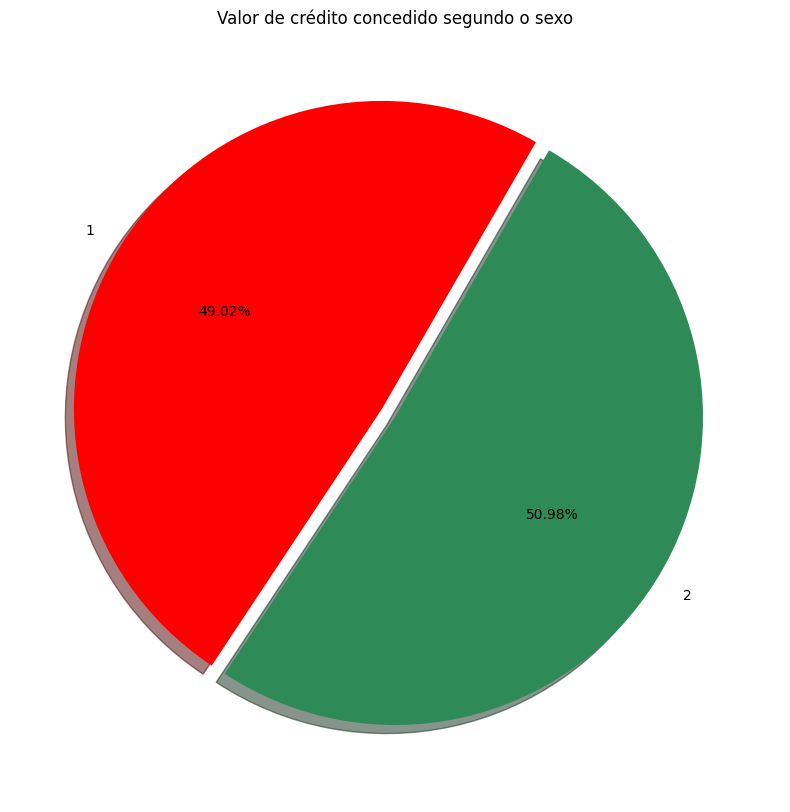

In [6]:
# GRÁFICO COM A MATPLOTLIB

# criar a representação, e.g., área de plotagem

fig, ax = plt.subplots(figsize=(10,10))

explode = (0.05, 0)  # deslocamento, fração do raio do gráfico

colors = ["red","seagreen"]

# criar o gráfico

ax.pie(credit_group["valor_credito"], labels=credit_group["sexo"], autopct="%.2f%%", shadow=True, explode=explode, startangle=60, colors=colors)
ax.set_title("Valor de crédito concedido segundo o sexo", fontsize=12)

plt.show()

In [20]:
# GRÁFICO COM A PLOTLY



fig = make_subplots(rows=1, cols=2, specs=[[{"type":"domain"},{"type":"domain"}]])


fig.add_trace(go.Pie(labels=credit_group["sexo"], values=credit_group["extrato_abr_2005"], name="Abril"), 1,1)
fig.add_trace(go.Pie(labels=credit_group["sexo"], values=credit_group["extrato_set_2005"], name="Setembro"), 1,2)

fig.update_traces(hole=0.3)

fig.update_layout(
    title_text = "Extrato de pagamento (Abril e Setembro de 2005) de acordo com sexo",
    annotations=[dict(text="Abril", x=0.2, y=0.5, font_size=18, showarrow=False),
                 dict(text="Setembro", x=0.836, y=0.5, font_size=18, showarrow=False)])

fig.show()

# Salvando o gráfico interativo
fig.write_html("extrato_sexo.html")